# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker

import glob, re

# Matplotlib Configuration

In [2]:
import scienceplots
plt.style.use('science')
plt.rcParams['figure.dpi'] = 300

# Input

In [3]:
tests = {}
for np_file in glob.glob('results/path_length_test/*.npy'):
    N = int(re.findall(r'\d+', np_file)[0])
    data = np.load(np_file)
    tests[N] = data

# Plots

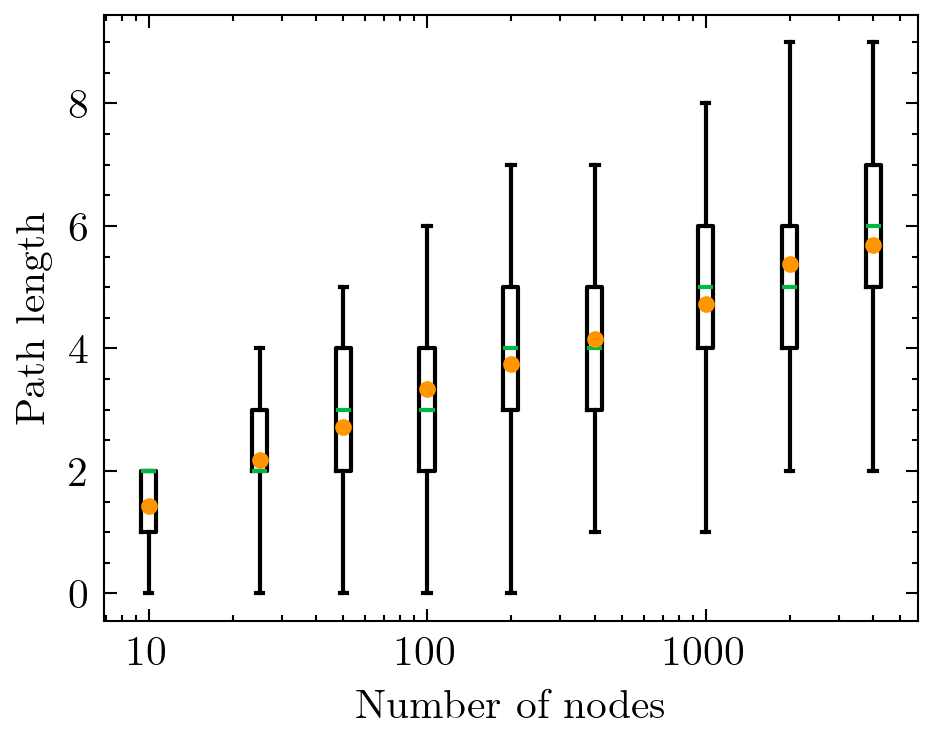

In [4]:
keys=[10,25,50,100,200,400,1000,2000,4000]
paths =[tests[i][:,0] for i in keys]

fig, ax = plt.subplots()

ax.boxplot(paths, widths=[k/8 for k in keys], showfliers=False, showmeans=True, whis=(1, 99), meanprops=dict(marker="."), positions=keys)
ax.set_xscale("log")

ax.set_ylabel("Path length")
ax.set_xlabel("Number of nodes")
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("figures/path_length_spread.png", dpi=1200)


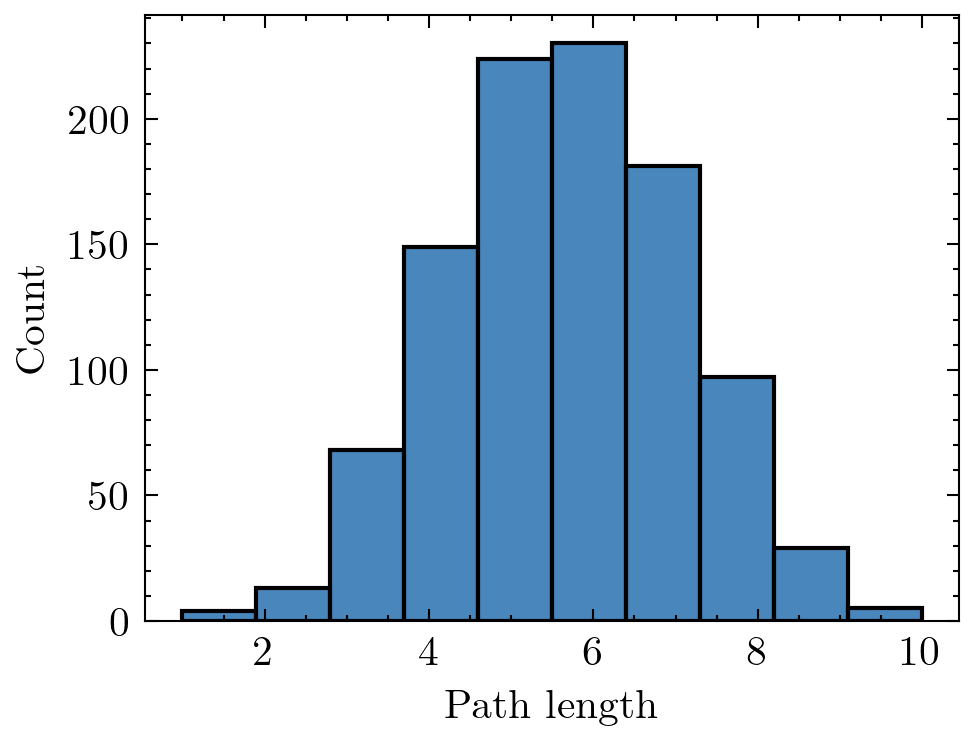

In [5]:
ax = sns.histplot(tests[4000][:,0],bins=10)
ax.set_xlabel("Path length")

plt.savefig("figures/path_length_4000.png", dpi=1200)